In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_cri=pd.read_excel('E:/DATASETS/Arrests_under_crime_against_women.xls')
df_cri=pd.DataFrame(df_cri)
df_cri.head()

,Area_Name,Year,Group_Name,Sub_Group_Name,Persons_Acquitted,Persons_against_whom_cases_Compounded_or_Withdrawn,Persons_Arrested,Persons_Chargesheeted,Persons_Convicted,Persons_in_Custody_or_on_Bail_during_Investigation_at_Year_beginning,Persons_in_Custody_or_on_Bail_during_Investigation_at_Year_end,Persons_in_Custody_or_on_Bail_during_Trial_at_Year_End,Persons_Released_or_Freed_by_Police_or_Magistrate_before_Trial_for_want_of_evidence_or_any_other_reason,Persons_Trial_Completed,Persons_under_Trial_at_Year_beginning,Total_Persons_under_Trial,Unnamed: 16
0,Andaman & Nicobar Islands,2001,Rape,01. Rape,6,0,3,3,0,6,6,45,0,6,48,51,NaN
1,Andhra Pradesh,2001,Rape,01. Rape,1168,13,1150,1021,246,450,545,2191,34,1414,2597,3618,NaN
2,Arunachal Pradesh,2001,Rape,01. Rape,1,0,51,31,2,25,30,347,15,3,319,350,NaN
3,Assam,2001,Rape,01. Rape,403,14,928,585,120,806,959,2331,190,523,2283,2868,NaN
4,Bihar,2001,Rape,01. Rape,756,0,1400,1302,217,719,576,5963,241,973,5634,6936,NaN


In [4]:
df_cri.columns=['State',"Year","Group",'Sub_group','Acquitted','Compounded_Withdrawn','Arrested','Chargesheeted','Convicted','Custody_or_Bail_Year_Begin','Custody_or_Bail_Year_End',"Custody_Bail_onTrial","Released","Trial_complete",'Trial_Year_Begin',"Total_under_Trial","Total"]

In [5]:
df_cri.head()

,State,Year,Group,Sub_group,Acquitted,Compounded_Withdrawn,Arrested,Chargesheeted,Convicted,Custody_or_Bail_Year_Begin,Custody_or_Bail_Year_End,Custody_Bail_onTrial,Released,Trial_complete,Trial_Year_Begin,Total_under_Trial,Total
0,Andaman & Nicobar Islands,2001,Rape,01. Rape,6,0,3,3,0,6,6,45,0,6,48,51,NaN
1,Andhra Pradesh,2001,Rape,01. Rape,1168,13,1150,1021,246,450,545,2191,34,1414,2597,3618,NaN
2,Arunachal Pradesh,2001,Rape,01. Rape,1,0,51,31,2,25,30,347,15,3,319,350,NaN
3,Assam,2001,Rape,01. Rape,403,14,928,585,120,806,959,2331,190,523,2283,2868,NaN
4,Bihar,2001,Rape,01. Rape,756,0,1400,1302,217,719,576,5963,241,973,5634,6936,NaN


In [6]:
arr= df_cri.groupby("Year")["Arrested"].sum().rename("No of Arrests from 2001 to 2010")
arr

Year
2001    467243
2002    475512
2003    460958
2004    503962
2005    511724
2006    538909
2007    600605
2008    304507
2009    652619
2010    671748
Name: No of Arrests from 2001 to 2010, dtype: int64

In [7]:
arr2= df_cri.groupby("State")["Arrested"].sum().rename("No_of_Arrests_from_2001_to_2010")
arr2= arr2.reset_index()
arr2

,State,No_of_Arrests_from_2001_to_2010
0,Andaman & Nicobar Islands,1189
1,Andhra Pradesh,558289
2,Arunachal Pradesh,3378
3,Assam,164471
4,Bihar,224737
5,Chandigarh,4319
6,Chhattisgarh,108159
7,Dadra & Nagar Haveli,511
8,Daman & Diu,417
9,Delhi,79883


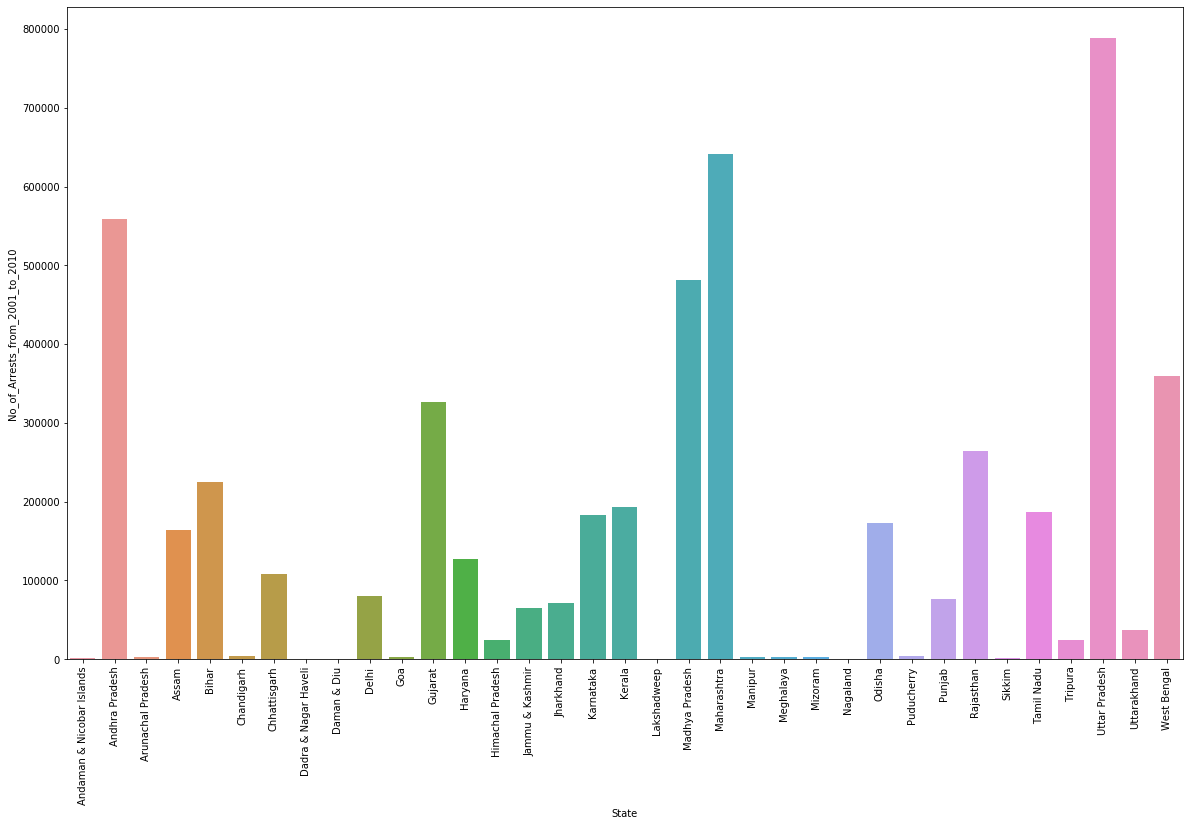

In [8]:
plt.figure(figsize=(20,12))
sns.barplot(x='State',y="No_of_Arrests_from_2001_to_2010",data=arr2)
plt.xticks(rotation = 90)
plt.show()

In [9]:
conv= df_cri.groupby("State")["Convicted"].sum().rename("No_of_Convicts_from_2001_to_2010")
conv= conv.reset_index()
conv

,State,No_of_Convicts_from_2001_to_2010
0,Andaman & Nicobar Islands,66
1,Andhra Pradesh,121564
2,Arunachal Pradesh,419
3,Assam,14414
4,Bihar,44010
5,Chandigarh,999
6,Chhattisgarh,26600
7,Dadra & Nagar Haveli,95
8,Daman & Diu,158
9,Delhi,17039


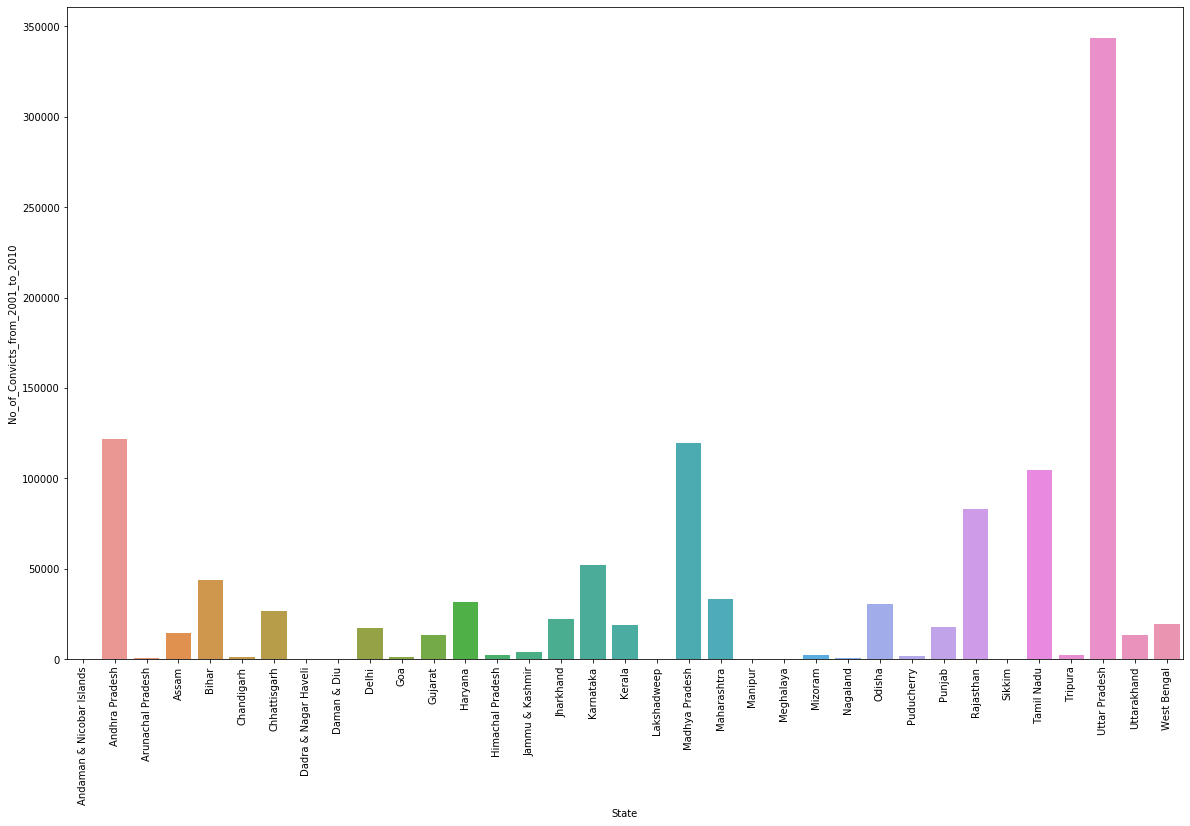

In [10]:
plt.figure(figsize=(20,12))
sns.barplot(x='State',y="No_of_Convicts_from_2001_to_2010",data=conv)
plt.xticks(rotation = 90)
plt.show()

In [11]:
df_cri["Year"] = pd.to_datetime(df_cri['Year'], format='%Y')
arr3= df_cri.groupby("Year")["Arrested"].sum().rename("No_of_Arrests_from_2001_to_2010")
arr3= arr3.reset_index()
arr3

,Year,No_of_Arrests_from_2001_to_2010
0,2001-01-01,467243
1,2002-01-01,475512
2,2003-01-01,460958
3,2004-01-01,503962
4,2005-01-01,511724
5,2006-01-01,538909
6,2007-01-01,600605
7,2008-01-01,304507
8,2009-01-01,652619
9,2010-01-01,671748


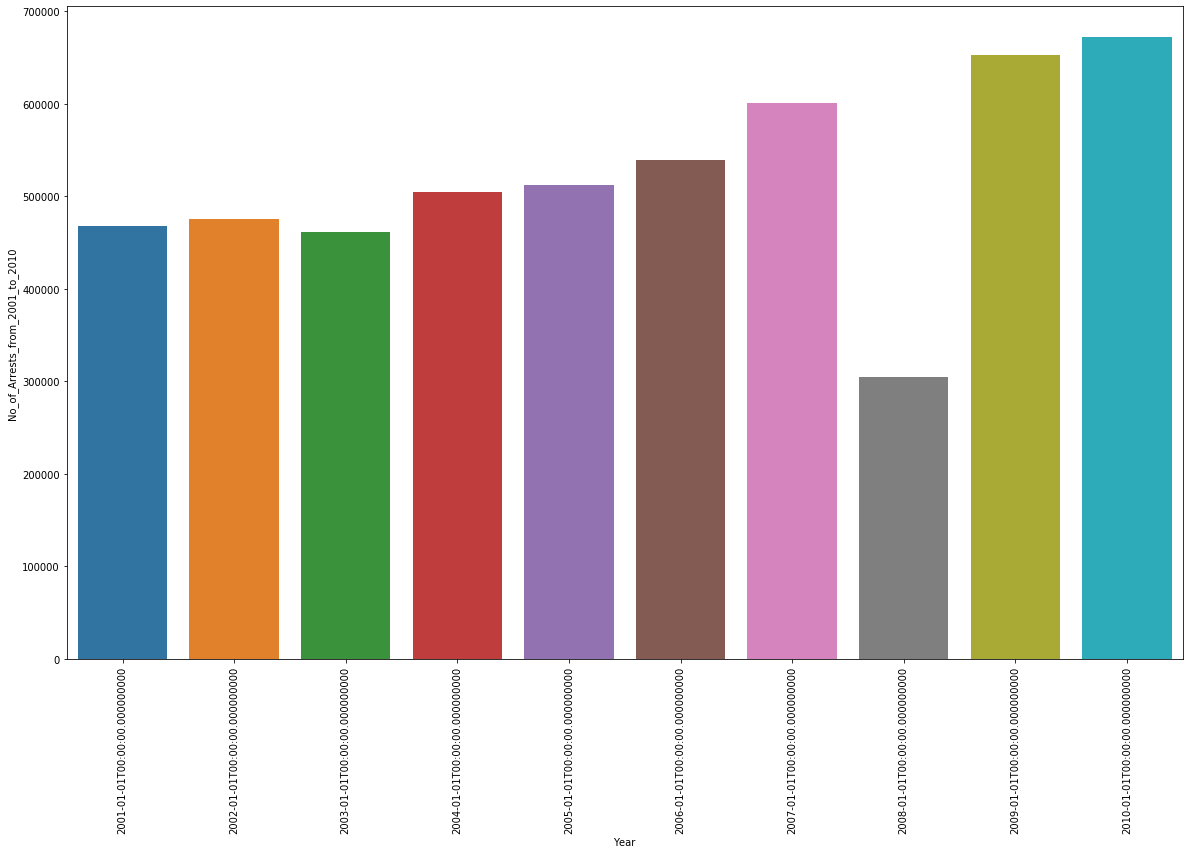

In [12]:
plt.figure(figsize=(20,12))
sns.barplot(x='Year',y="No_of_Arrests_from_2001_to_2010",data=arr3)
plt.xticks(rotation = 90)
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in ['State','Sub_group']:
    df_cri[i] = le.fit_transform(df_cri[i])

In [14]:
df_cri.corr()

,State,Sub_group,Acquitted,Compounded_Withdrawn,Arrested,Chargesheeted,Convicted,Custody_or_Bail_Year_Begin,Custody_or_Bail_Year_End,Custody_Bail_onTrial,Released,Trial_complete,Trial_Year_Begin,Total_under_Trial,Total
State,1.000000e+00,2.561334e-18,0.033953,-0.030631,0.056105,0.055087,0.111968,-0.005838,-0.018076,0.065673,0.006388,0.069422,0.067178,0.065135,-0.037492
Sub_group,2.561334e-18,1.000000e+00,0.435821,0.136038,0.150671,0.160108,0.128955,0.127305,0.124919,0.128504,0.120280,0.143998,0.127976,0.137545,-0.277723
Acquitted,3.395324e-02,4.358210e-01,1.000000,0.691705,0.854098,0.868700,0.550895,0.639068,0.641636,0.815658,0.241048,0.846881,0.819107,0.842633,-0.300064
Compounded_Withdrawn,-3.063068e-02,1.360378e-01,0.691705,1.000000,0.763065,0.790973,0.587908,0.472629,0.475216,0.606103,0.228997,0.754720,0.611631,0.658293,0.809983
Arrested,5.610483e-02,1.506707e-01,0.854098,0.763065,1.000000,0.991307,0.731559,0.714109,0.729131,0.884403,0.250285,0.977101,0.884620,0.919114,0.612327
Chargesheeted,5.508662e-02,1.601079e-01,0.868700,0.790973,0.991307,1.000000,0.711197,0.706190,0.706595,0.900839,0.243973,0.967789,0.900676,0.933972,0.809479
Convicted,1.119677e-01,1.289549e-01,0.550895,0.587908,0.731559,0.711197,1.000000,0.408870,0.395298,0.474178,0.465734,0.802801,0.489819,0.540518,0.788023
Custody_or_Bail_Year_Begin,-5.837660e-03,1.273052e-01,0.639068,0.472629,0.714109,0.706190,0.408870,1.000000,0.971446,0.600952,0.237978,0.664093,0.595643,0.624155,0.398492
Custody_or_Bail_Year_End,-1.807641e-02,1.249185e-01,0.641636,0.475216,0.729131,0.706595,0.395298,0.971446,1.000000,0.614106,0.273995,0.674040,0.607609,0.637768,0.834585
Custody_Bail_onTrial,6.567286e-02,1.285037e-01,0.815658,0.606103,0.884403,0.900839,0.474178,0.600952,0.614106,1.000000,0.122408,0.837400,0.999174,0.995472,0.831502


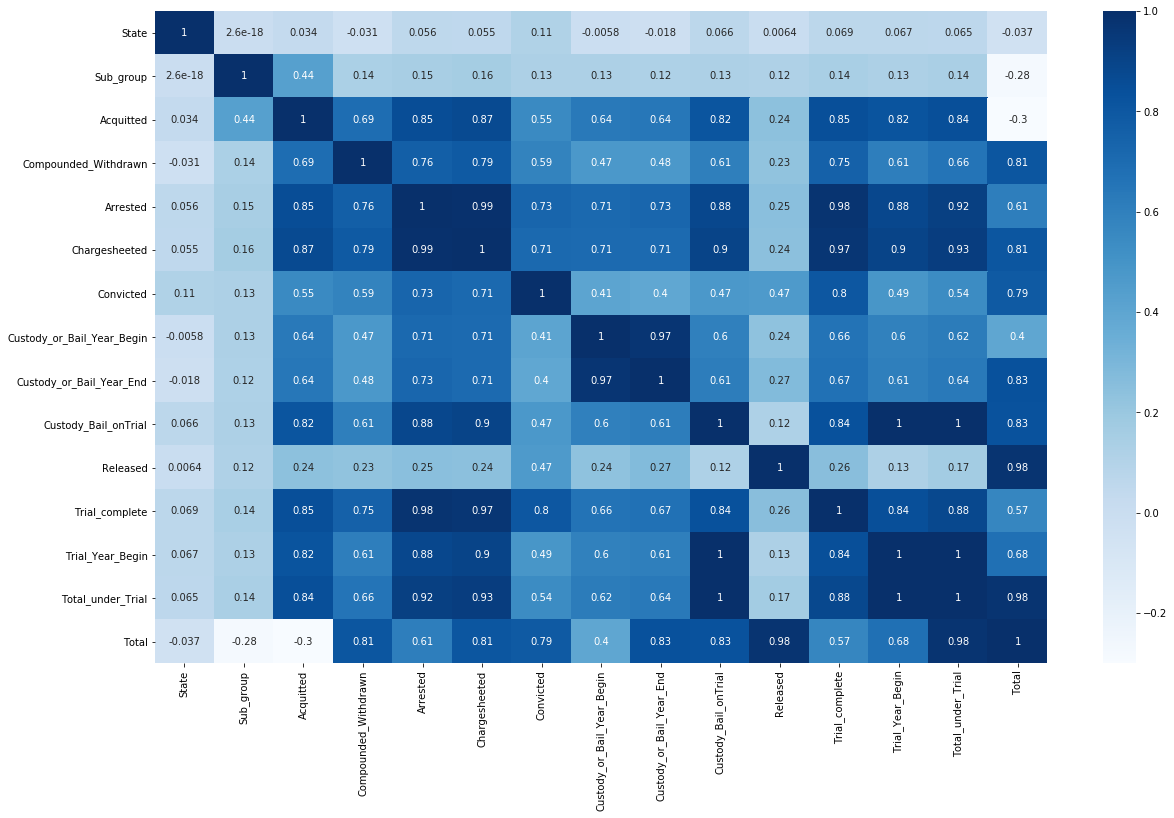

In [15]:
#showing the correlation using a heatmap from seaborn library
plt.figure(figsize=(20,12))
sns.heatmap(df_cri.corr(),cmap="Blues",annot=True)

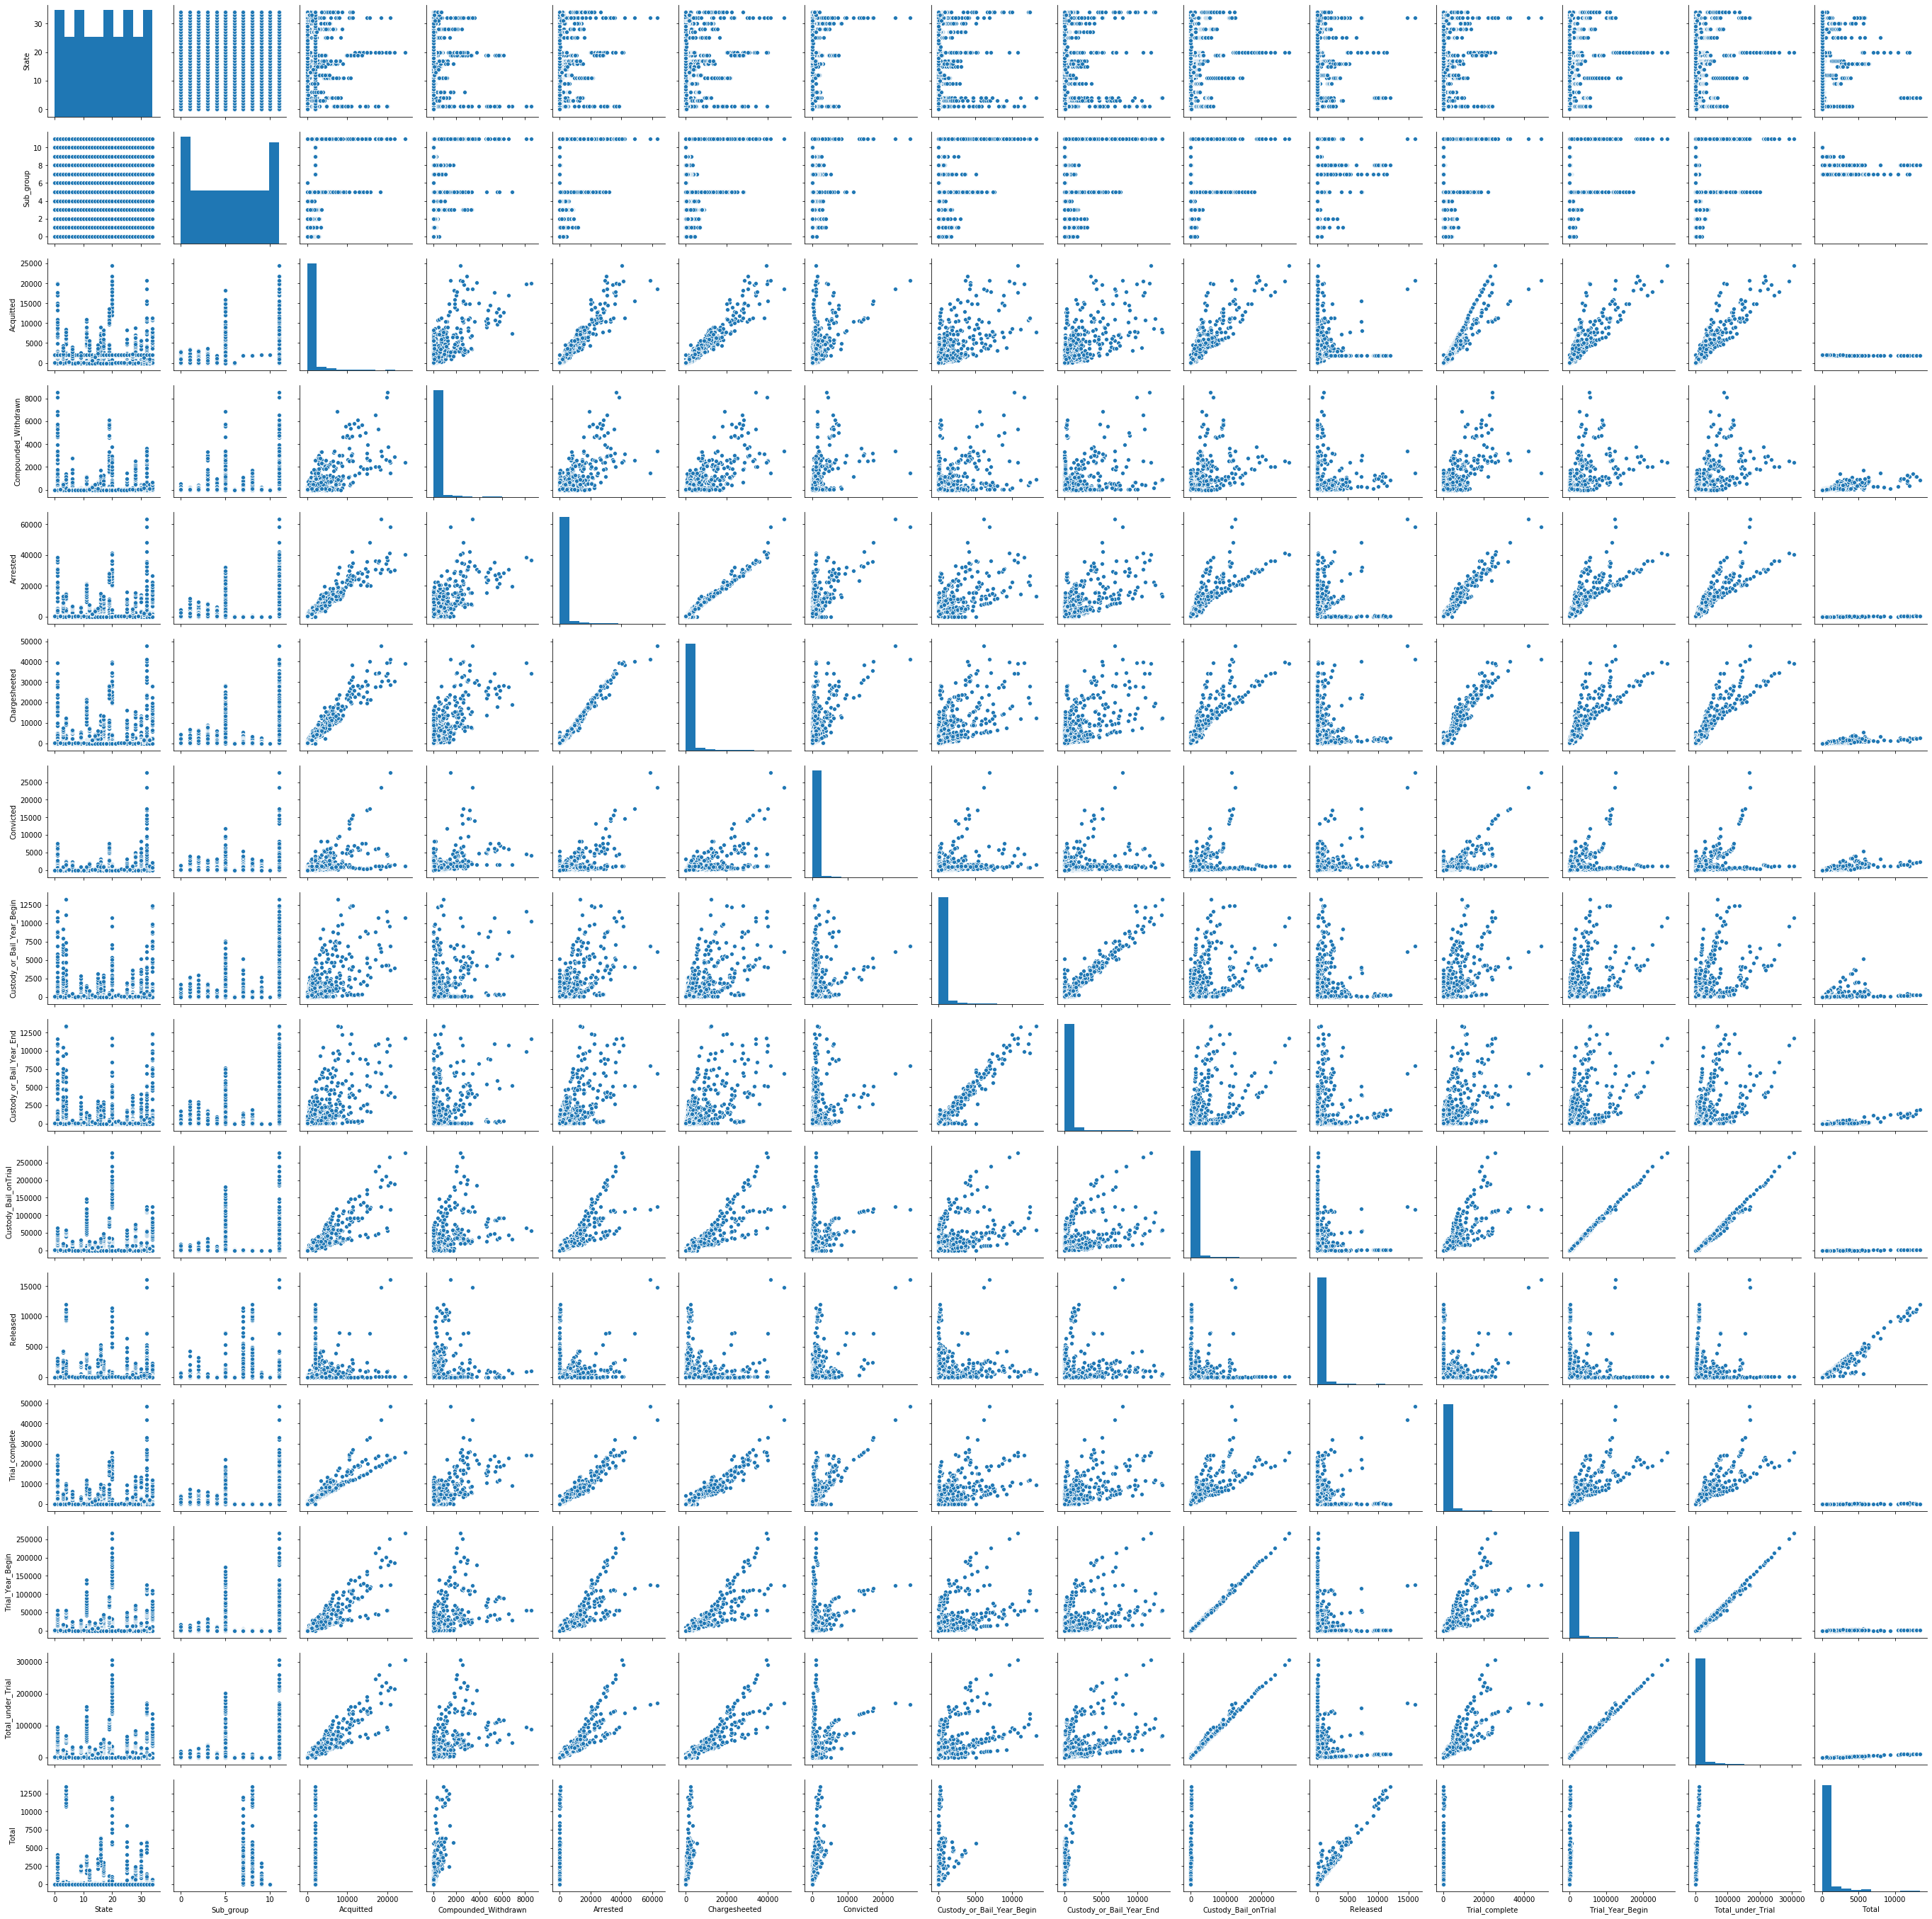

In [16]:
sns.pairplot(df_cri)

In [17]:
df_cri.drop(["Year",'Group','Total'],inplace=True,axis=1)

In [18]:
df_cri.skew()

State                          0.000000
Sub_group                      0.005770
Acquitted                      4.988000
Compounded_Withdrawn           7.671206
Arrested                       6.207909
Chargesheeted                  5.823582
Convicted                     11.667011
Custody_or_Bail_Year_Begin     6.721208
Custody_or_Bail_Year_End       6.737835
Custody_Bail_onTrial           7.874556
Released                       8.834289
Trial_complete                 6.813661
Trial_Year_Begin               7.938375
Total_under_Trial              7.327692
dtype: float64

In [19]:
#removing skewness using log transform
for col in df_cri.columns:
    if df_cri.skew().loc[col]>0.55:
        df_cri[col]=np.log1p(df_cri[col])

In [20]:
df_cri.skew()
#skewmess is reduced

State                         0.000000
Sub_group                     0.005770
Acquitted                    -0.628639
Compounded_Withdrawn          1.271491
Arrested                      0.534554
Chargesheeted                 0.322465
Convicted                     0.536638
Custody_or_Bail_Year_Begin    0.660233
Custody_or_Bail_Year_End      0.661629
Custody_Bail_onTrial          0.356535
Released                      1.053964
Trial_complete                0.609058
Trial_Year_Begin              0.288504
Total_under_Trial             0.141652
dtype: float64

In [21]:
#removing outliers using zscore
from scipy.stats import zscore
zscore=np.abs(zscore(df_cri))
print(zscore)

[[1.68325082 1.59032328 1.02817527 ... 0.28432866 0.03545375 0.13850338]
 [1.58423607 1.59032328 0.65305869 ... 1.40720974 1.05774034 1.01781628]
 [1.48522131 1.59032328 1.4397013  ... 0.46263269 0.48117843 0.38192858]
 ...
 [1.48522131 1.61727791 1.59915684 ... 2.53356318 2.12449476 2.06111278]
 [1.58423607 1.61727791 0.6187292  ... 1.53722306 1.3010494  1.23298517]
 [1.68325082 1.61727791 1.40041488 ... 2.08837198 2.08749926 2.00898204]]


In [22]:
print(np.where(zscore>3))

(array([1926, 1996, 2031, 2066, 2680, 2715, 2750, 2785, 2804, 2839, 2874,
       2909, 2944, 2979, 3014, 3049, 3084, 3119, 3869, 3904, 3939, 3956,
       3974, 3991, 4009, 4026, 4044, 4061, 4079, 4096, 4114, 4127, 4131,
       4149, 4162], dtype=int64), array([ 3,  3,  3,  3, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3, 10,  3,  3,
       10], dtype=int64))


In [23]:
df_cri_new=pd.DataFrame(df_cri[(zscore<3).all(axis=1)])

In [24]:
print(df_cri.shape)
print(df_cri_new.shape)

(4165, 14)
(4130, 14)


In [25]:
df_cri_new

,State,Sub_group,Acquitted,Compounded_Withdrawn,Arrested,Chargesheeted,Convicted,Custody_or_Bail_Year_Begin,Custody_or_Bail_Year_End,Custody_Bail_onTrial,Released,Trial_complete,Trial_Year_Begin,Total_under_Trial
0,0,0,1.945910,0.000000,1.386294,1.386294,0.000000,1.945910,1.945910,3.828641,0.000000,1.945910,3.891820,3.951244
1,1,0,7.063904,2.639057,7.048386,6.929517,5.509388,6.111467,6.302619,7.692570,3.555348,7.254885,7.862497,8.193953
2,2,0,0.693147,0.000000,3.951244,3.465736,1.098612,3.258097,3.433987,5.852202,2.772589,1.386294,5.768321,5.860786
3,3,0,6.001415,2.708050,6.834109,6.373320,4.795791,6.693324,6.866933,7.754482,5.252273,6.261492,7.733684,7.961719
4,4,0,6.629363,0.000000,7.244942,7.172425,5.384495,6.579251,6.357842,8.693497,5.488938,6.881411,8.636752,8.844625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4159,29,11,2.484907,1.386294,4.234107,4.060443,1.791759,3.218876,3.178054,4.905275,2.564949,2.833213,4.574711,5.036953
4160,30,11,8.627661,1.609438,9.174713,9.087268,7.940940,8.133881,8.303752,9.964583,5.181784,9.035153,9.943429,10.297420
4161,31,11,7.188413,5.043425,7.662938,7.385231,4.976734,6.013715,6.371612,7.688913,5.831882,7.291656,7.693482,8.244071
4163,33,11,6.959399,4.369448,7.467942,7.428927,6.981006,5.488938,5.446737,8.659560,4.356709,7.662938,8.746239,8.983440


In [26]:
#separating into input and output variables
df_x=df_cri_new.drop(columns=['Arrested'])
y=pd.DataFrame(df_cri_new['Arrested'])

In [27]:
#checking the shape
df_x.shape

(4130, 13)

In [28]:
y.shape

(4130, 1)

In [29]:
#scaling the input variable
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [30]:
x.skew()

State                        -0.003348
Sub_group                     0.013600
Acquitted                    -0.625279
Compounded_Withdrawn          1.266494
Chargesheeted                 0.324190
Convicted                     0.532554
Custody_or_Bail_Year_Begin    0.669668
Custody_or_Bail_Year_End      0.669305
Custody_Bail_onTrial          0.365140
Released                      1.037442
Trial_complete                0.611121
Trial_Year_Begin              0.294979
Total_under_Trial             0.145771
dtype: float64

In [56]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        cvs=cross_val_score(regr,x,y,cv=5,scoring='r2').mean()
        std=cross_val_score(regr,x,y,cv=5,scoring='r2').std()
        print("r2 score corresponding to",r_state,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to",final_r_state,"is",max_r_score)
    print("Mean r2 score cross_val:",cross_val_score(regr,x,y,cv=5,scoring='r2').mean())
    print('Standard Deviation in r2 score cross_val:',cross_val_score(regr,x,y,cv=5,scoring='r2').std())
    return final_r_state

In [57]:
#Using LinearRegression and checking maxr2 score corresponding to different random states
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)

r2 score corresponding to 42 is 0.9610109234009514
r2 score corresponding to 43 is 0.9625542217796275
r2 score corresponding to 44 is 0.9650365300123711
r2 score corresponding to 45 is 0.9672132350219881
r2 score corresponding to 46 is 0.9692735893446789
r2 score corresponding to 47 is 0.9586902600313584
r2 score corresponding to 48 is 0.9587054496783836
r2 score corresponding to 49 is 0.9663136715622371
r2 score corresponding to 50 is 0.9693258172267426
r2 score corresponding to 51 is 0.9663096669201083
r2 score corresponding to 52 is 0.9645961127971705
r2 score corresponding to 53 is 0.9620782591767573
r2 score corresponding to 54 is 0.9608923222843275
r2 score corresponding to 55 is 0.9583361574392717
r2 score corresponding to 56 is 0.9684465951894674
r2 score corresponding to 57 is 0.9621419547424704
r2 score corresponding to 58 is 0.9624223024165736
r2 score corresponding to 59 is 0.9574986644746084
r2 score corresponding to 60 is 0.9658284742034379
r2 score corresponding to 61 is

In [58]:
#Using LinearRegression and checking maxr2 score corresponding to different random states
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
r_state=maxr2_score(dtr,x,y)

r2 score corresponding to 42 is 0.9740824492639045
r2 score corresponding to 43 is 0.9801411172778262
r2 score corresponding to 44 is 0.9761909720638906
r2 score corresponding to 45 is 0.974472649527023
r2 score corresponding to 46 is 0.9818822669076938
r2 score corresponding to 47 is 0.9775695498309953
r2 score corresponding to 48 is 0.9726387048073383
r2 score corresponding to 49 is 0.9790380317027819
r2 score corresponding to 50 is 0.9718195184480785
r2 score corresponding to 51 is 0.9726066838899395
r2 score corresponding to 52 is 0.9740814318876099
r2 score corresponding to 53 is 0.9641084854501435
r2 score corresponding to 54 is 0.9763665318026652
r2 score corresponding to 55 is 0.9772135668806246
r2 score corresponding to 56 is 0.9799188888557406
r2 score corresponding to 57 is 0.970463470503144
r2 score corresponding to 58 is 0.9722957698921482
r2 score corresponding to 59 is 0.9636969997813035
r2 score corresponding to 60 is 0.9637726135594228
r2 score corresponding to 61 is 0

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={'n_neighbors':range(1,30)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors,cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 19}

In [59]:
#using KNN regression and checking max r2 score corresponding to different random states
knr=KNeighborsRegressor(n_neighbors=19)
r_state=maxr2_score(knr,x,y)

r2 score corresponding to 42 is 0.9812946238328734
r2 score corresponding to 43 is 0.9776287086414239
r2 score corresponding to 44 is 0.9778150850909274
r2 score corresponding to 45 is 0.9828136368761883
r2 score corresponding to 46 is 0.982777764647505
r2 score corresponding to 47 is 0.9745845478260643
r2 score corresponding to 48 is 0.9780540243187912
r2 score corresponding to 49 is 0.9824433223134394
r2 score corresponding to 50 is 0.9791352039861027
r2 score corresponding to 51 is 0.978000822920523
r2 score corresponding to 52 is 0.9787711659152695
r2 score corresponding to 53 is 0.9740185178368463
r2 score corresponding to 54 is 0.9772524872937913
r2 score corresponding to 55 is 0.9813486803887939
r2 score corresponding to 56 is 0.9845689394596273
r2 score corresponding to 57 is 0.9757478870413796
r2 score corresponding to 58 is 0.9759745958637701
r2 score corresponding to 59 is 0.9797012677332531
r2 score corresponding to 60 is 0.981701286888107
r2 score corresponding to 61 is 0.

In [63]:
#checking the mean r2 score of both Linear Regression Model and KNN Regression
from sklearn.model_selection import cross_val_score
print('Mean r2 score for Linear Regression:',cross_val_score(lreg,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for Linear Regression:',cross_val_score(lreg,x,y,cv=5,scoring='r2').std())
print()
print("Mean r2 score for KNN Regression:",cross_val_score(knr,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for KNN Regression:',cross_val_score(knr,x,y,cv=5,scoring='r2').std())
print()
print("Mean r2 score for DecisionTree Regression:",cross_val_score(dtr,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for DecisionTree Regression:',cross_val_score(dtr,x,y,cv=5,scoring='r2').std())

#Based on below output KNN Regression is performing well

Mean r2 score for Linear Regression: 0.5072215967571505
Standard Deviation in r2 score for Linear Regression: 0.913079194781946

Mean r2 score for KNN Regression: 0.6485463884395597
Standard Deviation in r2 score for KNN Regression: 0.6511012737392542

Mean r2 score for DecisionTree Regression: 0.4589006646549508
Standard Deviation in r2 score for DecisionTree Regression: 1.0274551058930352


In [37]:
#Checking lasso Regression and finding best value for alpha
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(lsreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.1}

In [41]:
#Checking max r2 score when we use Lasso
lsreg=Lasso(alpha=0.1)
r_state=maxr2_score(lsreg,x,y)

r2 score corresponding to 42 is 0.9537708862183618
r2 score corresponding to 43 is 0.9555094811659254
r2 score corresponding to 44 is 0.957596212041198
r2 score corresponding to 45 is 0.960298330668673
r2 score corresponding to 46 is 0.9640482957005664
r2 score corresponding to 47 is 0.9524396594540905
r2 score corresponding to 48 is 0.9510787803023966
r2 score corresponding to 49 is 0.9589015268050104
r2 score corresponding to 50 is 0.964813972192391
r2 score corresponding to 51 is 0.9582435140260146
r2 score corresponding to 52 is 0.9584128109284209
r2 score corresponding to 53 is 0.9568702409349581
r2 score corresponding to 54 is 0.9551268510941102
r2 score corresponding to 55 is 0.952039945304409
r2 score corresponding to 56 is 0.9635712908981465
r2 score corresponding to 57 is 0.9557614851515037
r2 score corresponding to 58 is 0.9583499362609579
r2 score corresponding to 59 is 0.9517067638560628
r2 score corresponding to 60 is 0.9604231930190539
r2 score corresponding to 61 is 0.9

In [42]:
#Using cross val score with lasso
print("Mean r2 score for Lasso Regression:",cross_val_score(lsreg,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for Lasso Regression:',cross_val_score(lsreg,x,y,cv=5,scoring='r2').std())

Mean r2 score for Lasso Regression: 0.4875069179005246
Standard Deviation in r2 score for Lasso Regression: 0.9454327230064451


In [43]:
#Checking Ridge regression and finding best value for alpha
from sklearn.linear_model import Ridge
rdreg=Ridge()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(rdreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 1}

In [64]:
#Checking max r2 score when we use Ridge
rdreg=Ridge(alpha=1)
r_state=maxr2_score(rdreg,x,y)

r2 score corresponding to 42 is 0.9610166597548603
r2 score corresponding to 43 is 0.96254295308472
r2 score corresponding to 44 is 0.9650123633641291
r2 score corresponding to 45 is 0.9671931211222569
r2 score corresponding to 46 is 0.9692755070612177
r2 score corresponding to 47 is 0.9586907697312151
r2 score corresponding to 48 is 0.9587157461663451
r2 score corresponding to 49 is 0.966297593042777
r2 score corresponding to 50 is 0.9693311036489197
r2 score corresponding to 51 is 0.9663034088818838
r2 score corresponding to 52 is 0.9645658489132665
r2 score corresponding to 53 is 0.962068896637523
r2 score corresponding to 54 is 0.9609043771659509
r2 score corresponding to 55 is 0.9583952889441865
r2 score corresponding to 56 is 0.9684495080047807
r2 score corresponding to 57 is 0.9621434063045431
r2 score corresponding to 58 is 0.962426967803529
r2 score corresponding to 59 is 0.9575200274376603
r2 score corresponding to 60 is 0.9658329813250341
r2 score corresponding to 61 is 0.95

In [65]:
#Using cross val score with Ridge
print("Mean r2 score for Ridge Regression:",cross_val_score(rdreg,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for Ridge Regression:',cross_val_score(rdreg,x,y,cv=5,scoring='r2').std())

Mean r2 score for Ridge Regression: 0.5081853757462304
Standard Deviation in r2 score for Ridge Regression: 0.9111988754521098


In [40]:
#Trying to use Gradient Boosting Technique
#For getting best set of parameters, using GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.01, 'n_estimators': 1000}

In [66]:
#Using cross val score to check the mean r2 score and standard deviation
gbr=GradientBoostingRegressor(learning_rate=0.01,n_estimators=1000)
print("Mean r2 score for Gradient Boosting Regression:",cross_val_score(gbr,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for Gradient Boosting Regression:',cross_val_score(gbr,x,y,cv=5,scoring='r2').std())

Mean r2 score for Gradient Boosting Regression: 0.8333440855630986
Standard Deviation in r2 score for Gradient Boosting Regression: 0.2832285034471592


In [68]:
#checking maximum r2 score corresponding to Gradient Boosting
r_state=maxr2_score(gbr,x,y)

r2 score corresponding to 42 is 0.9818233707932587
r2 score corresponding to 43 is 0.9819908865995651
r2 score corresponding to 44 is 0.9844343915893846
r2 score corresponding to 45 is 0.9831058527428885
r2 score corresponding to 46 is 0.9849635283574888
r2 score corresponding to 47 is 0.9794494037984327
r2 score corresponding to 48 is 0.9803978593474127
r2 score corresponding to 49 is 0.9845288125948849
r2 score corresponding to 50 is 0.9829310208175922
r2 score corresponding to 51 is 0.9838929295001668
r2 score corresponding to 52 is 0.9847109348621499
r2 score corresponding to 53 is 0.9761596575780339
r2 score corresponding to 54 is 0.9793388235237425
r2 score corresponding to 55 is 0.9809232899375521
r2 score corresponding to 56 is 0.9847424902187825
r2 score corresponding to 57 is 0.9787236813912127
r2 score corresponding to 58 is 0.9790267490873481
r2 score corresponding to 59 is 0.9798800607934013
r2 score corresponding to 60 is 0.9828811500483289
r2 score corresponding to 61 is

In [47]:
#Using Ada Boost regression algorithm
from sklearn.ensemble import AdaBoostRegressor
ada_reg=AdaBoostRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000],'base_estimator':[lreg,lsreg,DecisionTreeRegressor()]}
clf=GridSearchCV(ada_reg,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'base_estimator': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
 'learning_rate': 1,
 'n_estimators': 500}

In [67]:
dtr=DecisionTreeRegressor()
ada_reg=AdaBoostRegressor(base_estimator=dtr,learning_rate=1,n_estimators=500)
print("Mean r2 score for Ada Boost Regression:",cross_val_score(ada_reg,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for Ada Boost Regression:',cross_val_score(ada_reg,x,y,cv=5,scoring='r2').std())

Mean r2 score for Ada Boost Regression: 0.8043479972381954
Standard Deviation in r2 score for Ada Boost Regression: 0.49481375536277283


In [69]:
#checking maximum r2 score corresponding to Ada Boost
r_state=maxr2_score(ada_reg,x,y)

r2 score corresponding to 42 is 0.9909736573557713
r2 score corresponding to 43 is 0.9877771452776204
r2 score corresponding to 44 is 0.9893455921443959
r2 score corresponding to 45 is 0.9897089659550908
r2 score corresponding to 46 is 0.9903810222701177
r2 score corresponding to 47 is 0.9853634174445574
r2 score corresponding to 48 is 0.990191073248946
r2 score corresponding to 49 is 0.988729573161664
r2 score corresponding to 50 is 0.9864721187862922
r2 score corresponding to 51 is 0.9879209896467588
r2 score corresponding to 52 is 0.9896196408563498
r2 score corresponding to 53 is 0.9850509012805699
r2 score corresponding to 54 is 0.9855398340820838
r2 score corresponding to 55 is 0.9876825406273949
r2 score corresponding to 56 is 0.9864676825809707
r2 score corresponding to 57 is 0.9873384769027991
r2 score corresponding to 58 is 0.9837443249304946
r2 score corresponding to 59 is 0.9850237493770103
r2 score corresponding to 60 is 0.9876835727247418
r2 score corresponding to 61 is 0

In [70]:
#We tried all methods and till now Gradient Boosting Regressor and Ada Boost Regressor are the best

In [71]:
#Random state corresponding to highest r2 score is 64
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=64,test_size=0.20)
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_test)

In [72]:
#Finding RMSE and r2 score using sklearn.metrics
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2 score is:",r2_score(y_test,y_pred))

RMSE is: 0.3668259297893653
r2 score is: 0.9872864574484712


In [73]:
#Saving the modelas a pickle in a file
from sklearn.externals import joblib
joblib.dump(gbr,"crime_gbr.pkl")

['crime_gbr.pkl']